In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import numpy as np
from itertools import product

from sailing import SailingGridworld
from common import helper as h

/u/44/korhonj19/unix/rl_course/venv/lib/python3.8/site-packages/glfw/__init__.py:906: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)


In [12]:
gamma = 0.9
eps = 1e-4 # TODO: use this value for Task 2 and Task 3
value_update_iter = 100 # TODO: change this in Task 2
rock_penalty = -2 # TODO: change this in Q1.3

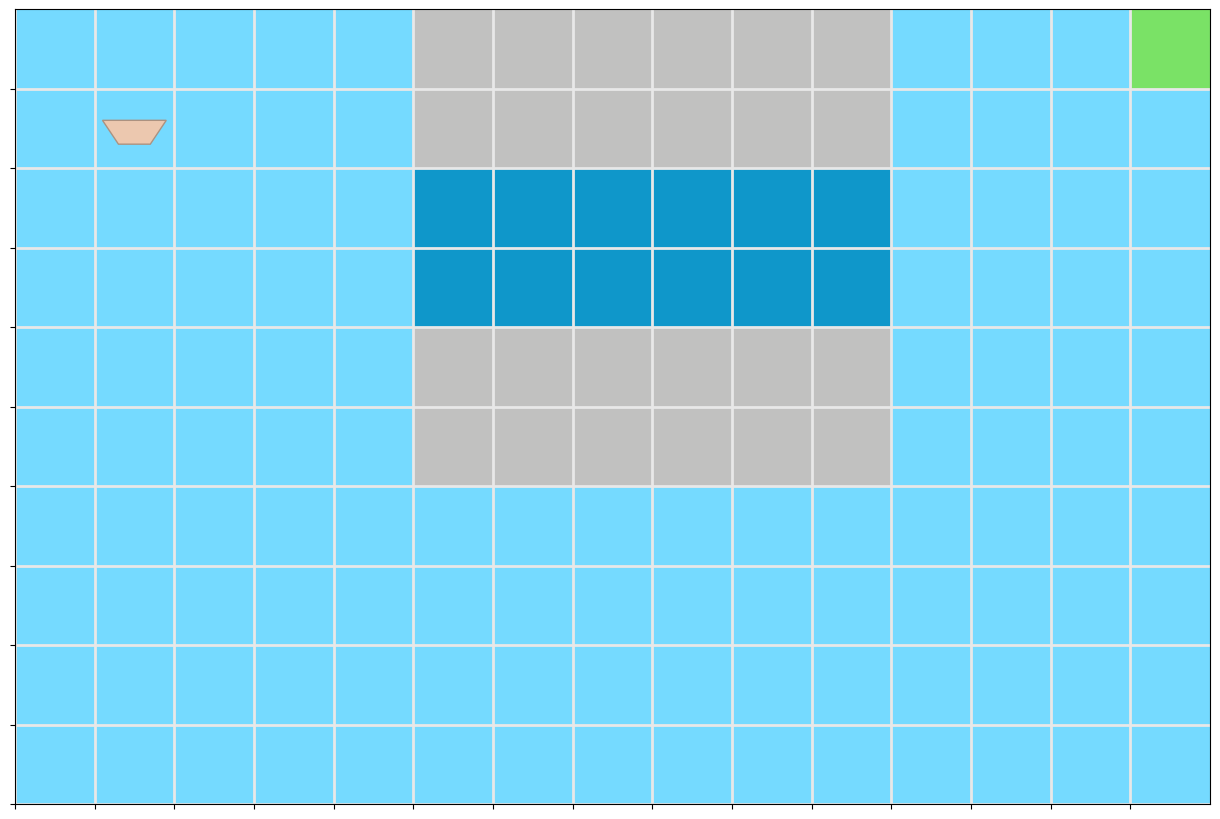

In [3]:
# Set up the environment
env = SailingGridworld(rock_penalty=rock_penalty, value_update_iter=value_update_iter)

In [13]:

def get_values_policy(iterations):
    v_est = np.zeros((env.w, env.h))
    policy = np.zeros((env.w, env.h))
    env.draw_values_policy(v_est, policy)

    convergence = 1000

    for n in range(iterations):
        # TODO: Task 1, implement the value iteration and policy
        # TODO: Task 2, convergency of the value function and policy

        ########## Your code starts here ##########
        v_est_old = v_est.copy()
        # TASK 1
        for i in range(env.w):
            for j in range(env.h):
                a_values = []
                for a in env.transitions[i,j]:
                    a_array = np.array(a) # (state=(3, 2), reward=0.0, done=0.0, prob=0.05)
                    state = a_array[:,0]
                    idx = [i for i in range(len(state)) if state[i] != None]
                    if len(idx)!=0:
                        state = np.array([*a_array[idx,0]])
                        a_values.append(np.sum(a_array[idx,3]*(a_array[idx,1] + gamma*v_est[state[:,0], state[:,1]])))
                    
                
                
                if len(a_values)!=0:
                    v_est[i,j] = np.max(a_values)
                    policy[i,j] = np.argmax(a_values)

        
        convergence = np.max(np.abs(v_est_old-v_est))
        #env.draw_values_policy(v_est, policy)
        if(convergence < eps):
            print("Converged at")
            print(n+1)
            return v_est, policy  
        #env.render()
        # Estimate new state values and calculate policy
        
        # Call env.draw_values_policy function after each iteration with your estimated state values and policy
        # to produce a GIF of the changing values (will be automatically created and saved)
        
        ########## Your code ends here ##########




    return v_est, policy


In [14]:
# value iteration -- update value estimation and policy
value_est, policy = get_values_policy(iterations=50)
env.draw_values_policy(value_est, policy)
env.render()

/tmp/ipykernel_53304/2340931352.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a_array = np.array(a) # (state=(3, 2), reward=0.0, done=0.0, prob=0.05)


Converged at
31


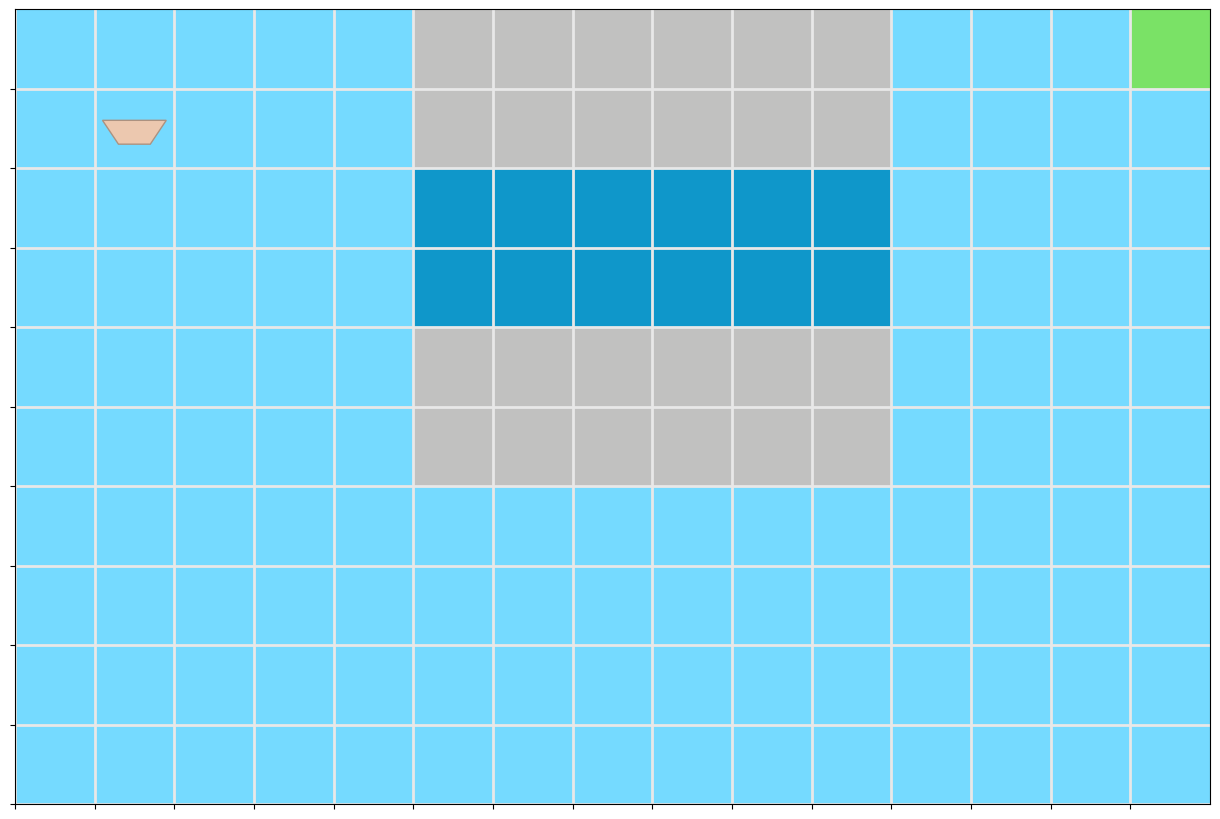

In [15]:
# Eval policy
N = 1000 # TODO: change for task 4


init_rets = []

for ep in range(N):
    ret_init = 0
    state = env.reset()
    done = False
    k = 0
    
    while not done:

        ########## You code starts here ##########

        # TODO: Use the policy to take the optimal action (Task 1)
        action = policy[state]

        # Take a step in the environment
        state, reward, done, _ = env.step(action)
        
        # TODO: Calculate discounted return for the initial state
        ret_init += gamma**k*reward
        k += 1
        ########## You code ends here ##########
        
        # Comment out the line below to disable rendering and make computations faster
        #env.render()
    
    init_rets.append(ret_init)


In [16]:
print("mean:")
print(np.mean(init_rets))

print("std:")
print(np.std(init_rets))

mean:
0.6934529247562079
std:
1.3620300324414032


In [7]:
# save value and policy
h.save_object({'value': value_est, 'policy': policy}, './value_policy.pkl')